# Comparing the raw scores computed by Descartes and Gregor
Import dependencies.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from IPython.display import HTML
from tables import IPythonTableBuilder
from projects import Project
from score_comparison import get_both_scores, render_table, show_plot, bland_altman_plot

Get the list of projects and compute the scores for both mutation engines.

In [2]:
projects = list(Project.available_projects())
scores = [get_both_scores(p) for p in projects]
descartes = [s[0].score for s in scores]
gregor = [s[1].score for s in scores]

Render a table listing all projects and all measured statistics.

In [3]:
render_table([p.name for p in projects], scores, IPythonTableBuilder)

Project,Mutants,Killed,Score,Mutants,Killed,Score
AuthZForce PDP Core,378,358,95%,3536,3188,90%
Amazon Web Services SDK,3090,2732,88%,17406,13536,78%
Apache Commons CLI,256,246,96%,2455,2183,89%
Apache Commons Codec,912,875,96%,8687,7765,89%
Apache Commons Collections,1556,1463,94%,8144,7073,87%
Apache Commons IO,1035,968,94%,7633,6500,85%
Apache Commons Lang,3261,3135,96%,25431,22120,87%
Apache Flink,2781,2373,85%,21350,16647,78%
Google Gson,657,617,94%,6179,5079,82%
Jaxen XPath Engine,953,921,97%,9002,6041,67%


Show the visual correlation of the scores obtained by both mutation engines.

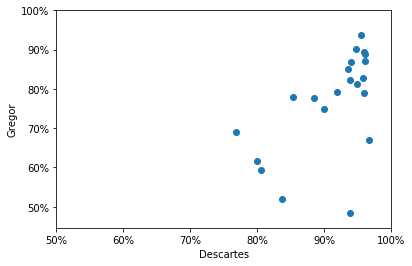

In [4]:
show_plot(descartes, gregor)

Compute and show the [Spearman correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) between both sets of scores.

In [5]:
corr = spearmanr(descartes, gregor)
HTML(f'''
The Spearman correlation coefficient is <strong>{corr.correlation}</strong> 
with a p-value of <strong>{corr.pvalue}</strong>
''')

The plot below shows the [Bland-Altman agreement plot](https://en.wikipedia.org/wiki/Bland%E2%80%93Altman_plot). The **X** axis shows the pariwise mean of the scores while the **Y** axis represents the pariwise subtraction of the scores. The solid line represents the mean of all differences and the dashed lines the interval between *mean+2std* and *mean+2std*.

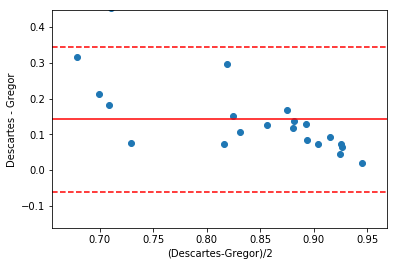

In [6]:
bland_altman_plot(descartes, gregor)